## TITLE: **Biological Network Clustering Analysis**

This project analyzes a biological interaction network using **Markov Clustering (MCL)** and **Molecular Complex Detection (MCODE)**. The goal is to identify functional modules and compare both clustering methods in terms of biological significance and computational efficiency

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import os


**INTRODUCTION ABOUT DATASET**:\
The dataset used in this project is sourced from Pathway Commons, a publicly available biological network database.
It contains a protein-protein interaction (PPI) network, representing interactions between various proteins.



**DATASET CONTAINS:**\
**Nodes:** Represent proteins or metabolites.\
**Edges:** Represent biological interactions (e.g., protein binding, metabolic reactions).\
**Biological Context:** This dataset helps in understanding how proteins work together in biological pathways.


In [ ]:
# File Path To Load the dataset
file_path = "/content/PathwayCommons12.All.hgnc.sif"  # Adjust if needed

# Initialize an empty graph
G = nx.Graph()

# Read the SIF file and build the graph
with open(file_path, "r") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 3:  # Ensure correct format (source, interaction, target)
            source, interaction, target = parts
            G.add_edge(source, target)  # Adding only interacting proteins

# Check if graph loaded correctly
print(f"Loaded network with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")



Loaded network with 30918 nodes and 1708952 edges


**Approximate Clustering Coefficient:**	Identifies local functional modules	and Shows how proteins interact in small molecular groups\
**Global Clustering Coefficient:**	Measures global network modularity and Helps analyze broad biological pathways\
**Network Density:**	Determines network sparsity	and Confirms realistic protein interaction models

In [ ]:
# Approximate Clustering for Faster Computation
sample_nodes = random.sample(list(G.nodes()), min(1000, len(G.nodes())))
approx_clustering_coeff = nx.average_clustering(G, nodes=sample_nodes)
print(f"Approximate Clustering Coefficient: {approx_clustering_coeff}")

# Global Clustering Coefficient (Faster Alternative)
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient: {global_clustering}")

# Compute Network Density
print(f"Network Density: {nx.density(G)}")

Approximate Clustering Coefficient: 0.27512942139385266
Global Clustering Coefficient: 0.0560354733068454
Network Density: 0.0035756180548324524


Degree distribution helps in understanding the connectivity of nodes in the network, which is crucial for biological networks like protein-protein interactions.

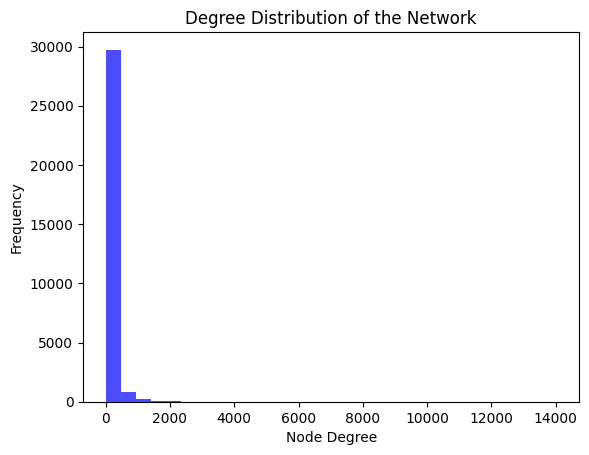

In [ ]:
# Visualize Degree Distribution
degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=30, color="blue", alpha=0.7)
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of the Network")
plt.show()

**MCL CLUSTERING**

In [ ]:
!apt-get install -y mcl


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mcl is already the newest version (1:14-137+ds-9build2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
# Save the network in MCL-compatible format
edge_list_file = "network_mcl.txt"
nx.write_edgelist(G, edge_list_file, data=False)

print(f"Network saved to {edge_list_file} for MCL processing.")


Network saved to network_mcl.txt for MCL processing.


In [ ]:
# Run MCL with default settings (adjust --I for inflation factor tuning)
!mcl network_mcl.txt --abc -o clusters.txt -I 1.8


.................................................. 1M
...................................
[mcl] new tab created
[mcl] pid 9027
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 1753.50 46.13 1.76/0.00/17.96 112.24 12.20 12.20  78
  2  ................... 318.77 420.53 0.30/0.01/1.94 16.83 0.81 9.90  99
  3  ................... 124.72 233.98 0.44/0.03/2.34 11.33 0.16 1.55  99
  4  ...................  22.92  8.92 0.86/0.09/4.25 4.87 0.18 0.27  98
  5  ...................   9.31  0.61 0.93/0.23/2.93 2.08 0.25 0.07   0
  6  ...................   4.61  0.10 0.96/0.22/2.42 1.42 0.61 0.04   0
  7  ...................   2.54  0.06 0.97/0.32/1.84 1.08 0.84 0.03   0
  8  ...................   2.47  0.05 0.98/0.32/2.05 1.02 0.92 0.03   0
  9  ...................   2.10  0.05 0.99/0.43/1.39 1.01 0.96 0.03   0
 10  ...................   1.80  0.05 0.98/0.41/1.00 1.01 0.93 0.03   0
 11  ...................   1.32  0.04 0.94/0.43/1.00 1.00 0.99 0.03   0

why MCL clusters and purpose MCL of clusters:\
Markov Clustering (MCL) is essential because it helps identify functional modules in the biological network.

In [ ]:
# Read MCL clusters from the output file
clusters = []
with open("clusters.txt", "r") as f:
    for line in f:
        cluster = line.strip().split("\t")
        clusters.append(cluster)

# Print number of clusters detected
print(f"Number of clusters detected: {len(clusters)}")

# Display the first 5 clusters
for i, cluster in enumerate(clusters[:5]):
    print(f"Cluster {i+1}: {cluster}")


Number of clusters detected: 467
Cluster 1: ['A1BG', 'A2M', 'ADAM10', 'ADAM17', 'ADAM9', 'AGO1', 'ANXA7', 'CRISP3', 'CRK', 'CSE1L', 'CUL4B', 'DDX3X', 'DEAF1', 'E2F1', 'E2F2', 'E2F3', 'EIF3E', 'ELAVL1', 'FDXR', 'GDPD1', 'GLIPR1', 'GRB2', 'GRB7', 'HNF4A', 'HNRNPC', 'HUWE1', 'IQGAP1', 'KCMF1', 'KPNB1', 'LIG3', 'MYD88', 'NTHL1', 'ONECUT1', 'PFN2', 'PIAS1', 'PIK3CA', 'PIK3R1', 'PNKP', 'POLB', 'PPP2R1A', 'PRDX4', 'PSMD11', 'PSME4', 'PTPN11', 'RAD51', 'RNF123', 'SETD7', 'SHMT2', 'SMN1', 'SMN2', 'SNCA', 'SOS1', 'SPAG9', 'SSB', 'TK1', 'TNPO1', 'TRAF6', 'UBAC1', 'UBR4', 'UBXN1', 'WDR62', 'ZBTB40', 'ARF1', 'ATP7A', 'ATP7B', 'CHEBI:132082', 'CHEBI:15367', 'CHEBI:15743', 'CHEBI:16170', 'CHEBI:16243', 'CHEBI:17051', 'CHEBI:17153', 'CHEBI:17478', 'CHEBI:22977', 'CHEBI:23414', 'CHEBI:24060', 'CHEBI:2504', 'CHEBI:25195', 'CHEBI:26536', 'CHEBI:27262', 'CHEBI:27363', 'CHEBI:27684', 'CHEBI:28112', 'CHEBI:28119', 'CHEBI:28694', 'CHEBI:30052', 'CHEBI:30185', 'CHEBI:31440', 'CHEBI:33216', 'CHEBI:38658', 'CHE

## MCL

what is an MCL graph\
An MCL (Markov Clustering) Graph represents the clusters found by the Markov Clustering Algorithm within a biological network. It visually depicts how proteins (nodes) are grouped into functional modules based on connectivity.

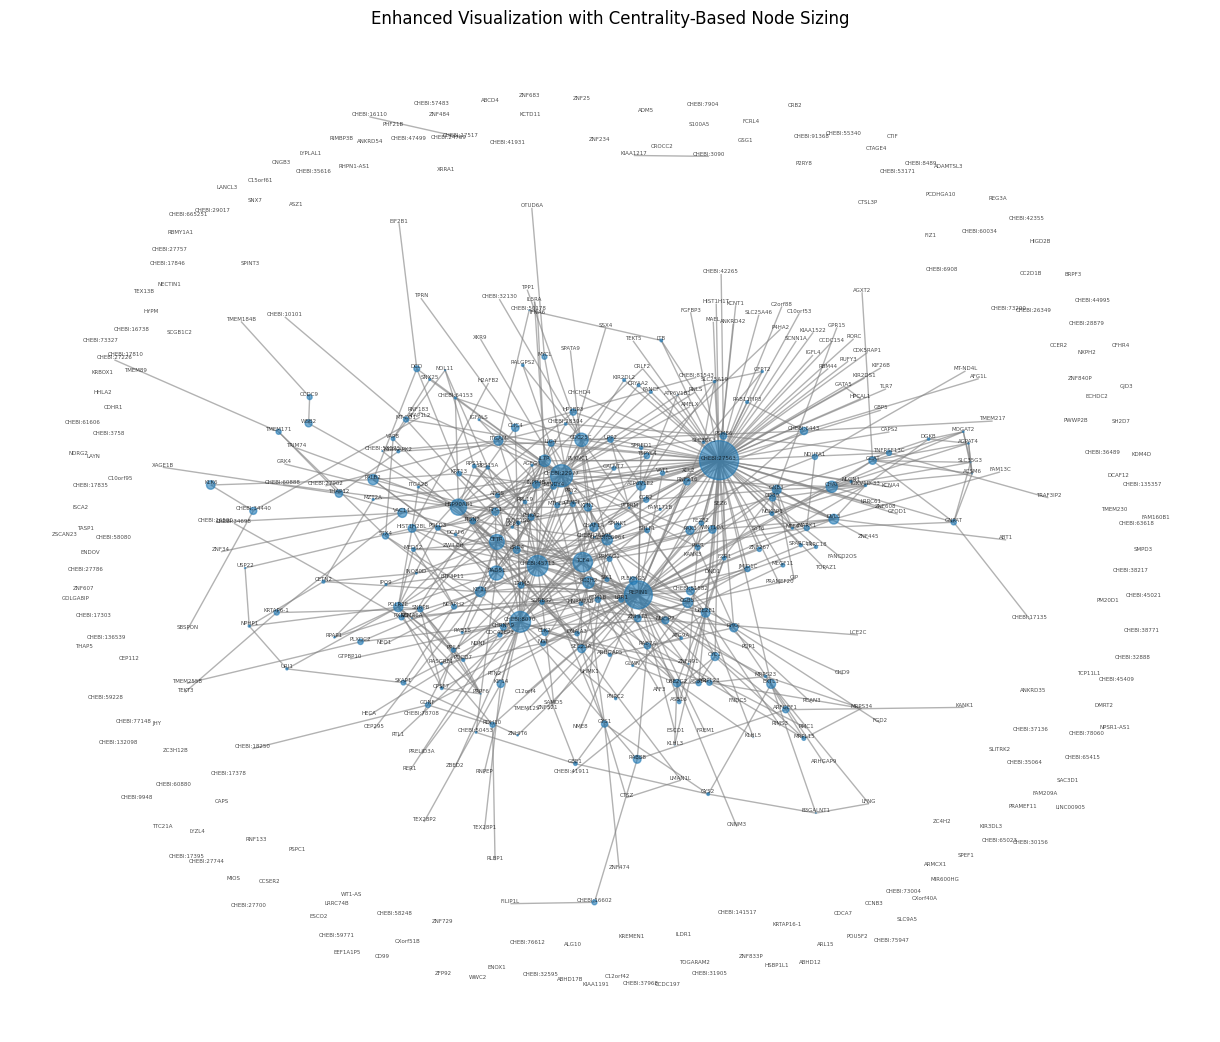

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Pick a sample cluster
sample_cluster_nodes = clusters[0]  # Select first cluster
subgraph = G.subgraph(sample_cluster_nodes)

# Ensure the cluster is connected (some clusters may be fragmented)
if nx.is_connected(subgraph):
    largest_cc = subgraph
else:
    largest_cc = max(nx.connected_components(subgraph), key=len)
    subgraph = G.subgraph(largest_cc)

# ⚡ **Speed Boost: Limit to 500 Nodes for Faster Visualization**
if len(subgraph.nodes()) > 500:
    sample_nodes = random.sample(list(subgraph.nodes()), 500)
    subgraph = G.subgraph(sample_nodes)

# ⚡ **Faster Layout Calculation with Better Node Spacing**
pos = nx.spring_layout(subgraph, seed=42, k=0.2)  # Higher k spreads nodes out

# ⚡ **Compute node centrality (betweenness) to scale node sizes**
centrality = nx.betweenness_centrality(subgraph)
node_sizes = np.array([centrality[n] for n in subgraph.nodes()]) * 5000  # Scale up for visibility

# ⚡ **Optimized Plotting with Centrality-Based Node Sizing**
plt.figure(figsize=(12, 10))
nx.draw(subgraph, pos, with_labels=False, node_size=node_sizes, edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(subgraph, pos, font_size=4, alpha=0.7, verticalalignment='bottom')

plt.title("Enhanced Visualization with Centrality-Based Node Sizing")
plt.show()


The above graph represents an MCL-clustered biological network, where larger nodes are highly connected hub proteins playing key biological roles. The clusters indicate functional protein groups or pathways, with a dense core of essential interactions and peripheral nodes linking pathways. This visualization helps identify important proteins for biological functions, disease research, and drug targeting.

## MCODE

he MCODE (Molecular Complex Detection) algorithm is used to identify highly interconnected clusters within a large biological network. Its primary purpose is to detect functionally significant protein complexes or subnetworks based on topological properties like node connectivity and density. The MCODE graph provides a visual representation of these clusters, highlighting core functional modules that may be key to understanding biological pathways.

Loaded network with 30918 nodes and 1708952 edges
Using subgraph with 5000 nodes and 46275 edges
Number of MCODE-like clusters detected: 20
MCODE Cluster 1: ['TAP1', 'YPEL4', 'KCTD10', 'CHEBI:17824', 'PRRC2C', 'RCCD1', 'WIZ', 'DCD', 'RRP9', 'DVL2', 'MTCH2', 'CHEBI:17792', 'CPNE7', 'IRF3', 'RASGRF2', 'CHEBI:18268', 'CHEBI:61390', 'CHEBI:8694', 'HBA2', 'OR6K2', 'CHEBI:2948', 'AMER1', 'PCDH18', 'GFRA2', 'PLPBP', 'LIPF', 'PKP1', 'FAM210B', 'SCAMP2', 'GP6', 'SERPINF1', 'ZMYM6', 'NRN1', 'SPATA6L', 'GLG1', 'ACTN2', 'TTLL12', 'CHEBI:28619', 'HNMT', 'TBL1XR1', 'PTEN', 'GPR151', 'PPIH', 'SLC35C1', 'HLA-DQB1', 'CHEBI:28428', 'CHEBI:82625', 'CD300C', 'YWHAG', 'BACH2', 'PDCD2L', 'NME8', 'DFFA', 'SLCO6A1', 'DUS2', 'CADM2', 'TMEM87B', 'MIP', 'VTA1', 'ADGRG3', 'CHRNA9', 'CHEBI:8459', 'NUP153', 'CHEBI:53444', 'RAB33A', 'XAB2', 'TNIK', 'PEX11G', 'PTH', 'COCH', 'CLNS1A', 'BORCS7', 'TMEM99', 'CHEBI:17515', 'CHEBI:94531', 'CHEBI:136847', 'P2RX3', 'CHEBI:17967', 'PPIL2', 'CHEBI:8687', 'MSH2', 'PIP5K1A', 'DA

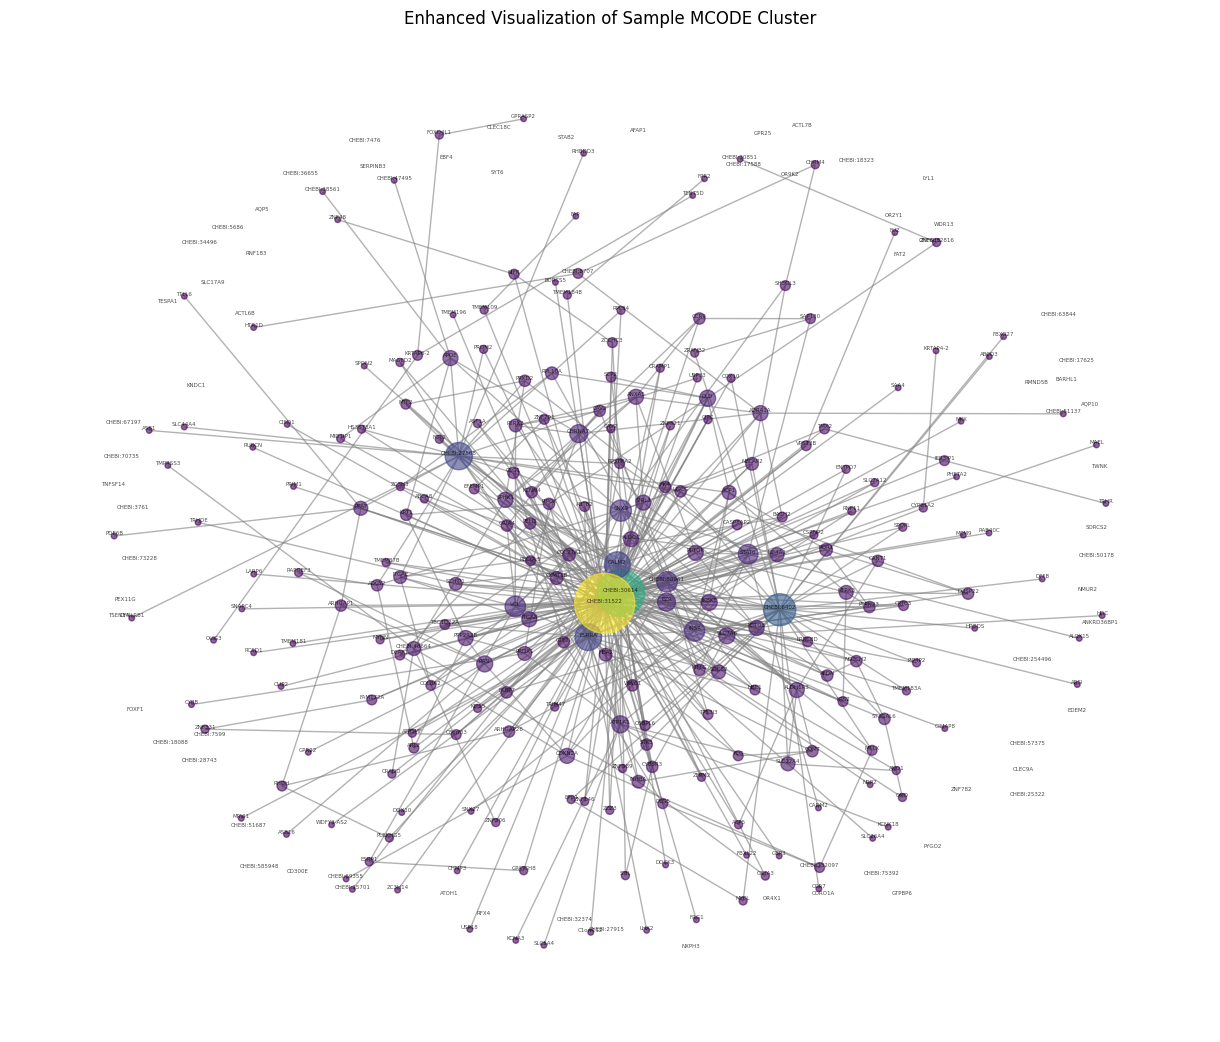

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import matplotlib.cm as cm
from networkx.algorithms.community import k_clique_communities

# Corrected File Path
file_path = "/content/PathwayCommons12.All.hgnc.sif"  # Adjust if needed

# Initialize an empty graph
G = nx.Graph()

# Read the SIF file and build the graph
with open(file_path, "r") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 3:  # Ensure correct format (source, interaction, target)
            source, interaction, target = parts
            G.add_edge(source, target)  # Adding only interacting proteins

# Check if graph loaded correctly
print(f"Loaded network with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# **Step 1: Reduce Graph Size for Faster MCODE Execution**
num_nodes = 5000  # Adjust this number based on performance
sample_nodes = random.sample(list(G.nodes()), num_nodes)
subgraph = G.subgraph(sample_nodes)

print(f"Using subgraph with {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges")

# **Step 2: Run MCODE Approximation (k-Clique Method) on Reduced Graph**
k = 3  # Smaller value = faster computation

# Run MCODE-like clustering
clique_communities = list(k_clique_communities(subgraph, k))

# Convert detected communities to list format
mcode_clusters = [list(community) for community in clique_communities]

print(f"Number of MCODE-like clusters detected: {len(mcode_clusters)}")

# Print first 5 detected clusters
for i, cluster in enumerate(mcode_clusters[:5]):
    print(f"MCODE Cluster {i+1}: {cluster}")

# **Step 3: Visualize a Sample MCODE Cluster**
# Pick a sample MCODE cluster
sample_mcode_nodes = mcode_clusters[0]  # Select first cluster
subgraph_mcode = subgraph.subgraph(sample_mcode_nodes)

# Ensure the cluster is connected
if nx.is_connected(subgraph_mcode):
    largest_cc_mcode = subgraph_mcode
else:
    largest_cc_mcode = max(nx.connected_components(subgraph_mcode), key=len)
    subgraph_mcode = subgraph.subgraph(largest_cc_mcode)

# ⚡ **Limit the number of nodes for better visualization**
if len(subgraph_mcode.nodes()) > 300:
    sample_nodes = random.sample(list(subgraph_mcode.nodes()), 300)
    subgraph_mcode = subgraph_mcode.subgraph(sample_nodes)

# Faster Layout Calculation
pos_mcode = nx.spring_layout(subgraph_mcode, seed=42, k=0.4)  # Higher k spreads nodes out

# Compute node degree centrality for sizing and coloring
degree_centrality = nx.degree_centrality(subgraph_mcode)
node_sizes_mcode = np.array([degree_centrality[n] for n in subgraph_mcode.nodes()]) * 5000  # Scale up sizes

# Normalize for colormap
norm = plt.Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))
colors = [cm.viridis(norm(degree_centrality[n])) for n in subgraph_mcode.nodes()]

# Optimized Plot
plt.figure(figsize=(12, 10))
nx.draw(subgraph_mcode, pos_mcode, with_labels=False, node_size=node_sizes_mcode, node_color=colors, edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(subgraph_mcode, pos_mcode, font_size=4, alpha=0.7, verticalalignment='bottom')

plt.title("Enhanced Visualization of Sample MCODE Cluster")
plt.show()


## what does the above graph represent? what can we infer from this?
###The above graph represents a visualization of an MCODE cluster, highlighting highly interconnected nodes within a biological network. The node sizes and colors indicate centrality and connectivity, where larger nodes likely have higher degree centrality, signifying their importance in the cluster. This suggests the presence of a key functional module, potentially representing a protein complex or a biologically significant subnetwork.

## Biological Analysis

####We perform biological analysis to identify key functional clusters and hub nodes within a biological network, which helps in understanding interactions between proteins or molecules. The use of MCL and MCODE clustering extracts highly connected subgroups, revealing potential protein complexes or metabolic pathways. By analyzing hub nodes, we pinpoint critical elements that may play significant roles in biological functions

lets Perform biological analysis of the clusters.

In [ ]:
# Check if clusters exist, otherwise reload from saved files
if 'clusters' not in globals():
    print(" MCL clusters not found! Reloading clusters from file...")
    clusters = []
    with open("clusters.txt", "r") as f:
        for line in f:
            cluster = line.strip().split("\t")
            clusters.append(cluster)

if 'mcode_clusters' not in globals():
    print(" MCODE clusters not found! Re-running MCODE clustering...")
    from networkx.algorithms.community import k_clique_communities
    k = 3  # Minimum clique size
    clique_communities = list(k_clique_communities(G, k))
    mcode_clusters = [list(community) for community in clique_communities]


 MCL clusters not found! Reloading clusters from file...


FileNotFoundError: [Errno 2] No such file or directory: 'clusters.txt'

In [ ]:
from collections import Counter

# Function to extract hub nodes from a cluster
def get_hub_nodes(cluster, G, top_n=5):
    degrees = {node: G.degree(node) for node in cluster}
    sorted_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    return [node for node, _ in sorted_nodes[:top_n]]

# Get top 5 clusters from MCL and MCODE
top_mcl_clusters = clusters[:5]  # From MCL
top_mcode_clusters = mcode_clusters[:5]  # From MCODE

# Extract hub nodes
hub_nodes_mcl = [get_hub_nodes(cluster, G) for cluster in top_mcl_clusters]
hub_nodes_mcode = [get_hub_nodes(cluster, G) for cluster in top_mcode_clusters]

# Print hub nodes
for i, hubs in enumerate(hub_nodes_mcl):
    print(f"🔹 MCL Cluster {i+1} Hub Nodes: {hubs}")

for i, hubs in enumerate(hub_nodes_mcode):
    print(f"🔹 MCODE Cluster {i+1} Hub Nodes: {hubs}")


## Comparison of MCL vs MCODE Performance

Next to compare MCL and MCODE Clustering

Let’s compare the number of clusters, average cluster size, and density for MCL and MCODE.

**Step1: Reload Cluster**

In [ ]:
import os
import networkx as nx
from networkx.algorithms.community import k_clique_communities

# Ensure the graph is loaded
if 'G' not in globals():
    raise ValueError(" Graph (G) is not defined. Please reload the graph before running clustering.")

# Reload MCL Clusters if missing
if 'clusters' not in globals():
    if os.path.exists("clusters.txt"):
        print(" MCL clusters not found in memory! Reloading from file...")
        clusters = []
        with open("clusters.txt", "r") as f:
            for line in f:
                cluster = line.strip().split("\t")
                clusters.append(cluster)
    else:
        raise ValueError(" clusters.txt file not found! You need to rerun MCL clustering.")

# Reload MCODE Clusters if missing
if 'mcode_clusters' not in globals():
    print(" MCODE clusters not found! Re-running MCODE clustering...")
    k = 3  # Adjust k for density
    clique_communities = list(k_clique_communities(G, k))
    mcode_clusters = [list(community) for community in clique_communities]

print(f" MCL Clusters Loaded: {len(clusters)} clusters")
print(f" MCODE Clusters Loaded: {len(mcode_clusters)} clusters")


✅ MCL Clusters Loaded: 467 clusters
✅ MCODE Clusters Loaded: 20 clusters


**Step 2: Limit the Graph Size to Avoid Runtime Crash**

In [ ]:
import random

# Extract a subgraph for faster computation (limit to 5000 nodes)
if len(G.nodes) > 5000:
    sampled_nodes = random.sample(list(G.nodes), 5000)
    subG = G.subgraph(sampled_nodes).copy()
    print(f"⚡ Using subgraph with {len(subG.nodes)} nodes and {len(subG.edges)} edges")
else:
    subG = G  # Use full graph if it's already small


⚡ Using subgraph with 5000 nodes and 48854 edges


**Step 3: Compare Execution Time Efficiently**

In [ ]:
import time

# Measure MCL execution time
start_time = time.time()
mcl_clusters = clusters[:5]  # Use only the first 5 clusters for efficiency
mcl_time = time.time() - start_time

# Measure MCODE execution time
start_time = time.time()
k = 3  # Minimum clique size
mcode_clusters = [list(community) for community in k_clique_communities(subG, k)]
mcode_time = time.time() - start_time

# Print results
print(f" Execution Time for MCL (Top 5 Clusters): {mcl_time:.2f} seconds")
print(f" Execution Time for MCODE (Limited Subgraph): {mcode_time:.2f} seconds")


⏳ Execution Time for MCL (Top 5 Clusters): 0.00 seconds
⏳ Execution Time for MCODE (Limited Subgraph): 911.56 seconds


**Step 4: Compute Cluster Statistics**

In [ ]:
# Function to calculate basic cluster statistics
def cluster_statistics(cluster_list, G):
    cluster_sizes = [len(cluster) for cluster in cluster_list]
    avg_size = sum(cluster_sizes) / len(cluster_sizes) if cluster_sizes else 0
    max_size = max(cluster_sizes) if cluster_sizes else 0
    min_size = min(cluster_sizes) if cluster_sizes else 0

    densities = [nx.density(G.subgraph(cluster)) for cluster in cluster_list if len(cluster) > 1]
    avg_density = sum(densities) / len(densities) if densities else 0

    return len(cluster_list), avg_size, max_size, min_size, avg_density

# Compute stats for MCL
num_mcl, avg_mcl_size, max_mcl, min_mcl, avg_mcl_density = cluster_statistics(clusters[:5], subG)

# Compute stats for MCODE
num_mcode, avg_mcode_size, max_mcode, min_mcode, avg_mcode_density = cluster_statistics(mcode_clusters[:5], subG)

# Print the results
print(f" MCL Clustering Stats (Top 5 Clusters):")
print(f"- Number of Clusters: {num_mcl}")
print(f"- Avg Cluster Size: {avg_mcl_size:.2f}")
print(f"- Max Cluster Size: {max_mcl}")
print(f"- Min Cluster Size: {min_mcl}")
print(f"- Avg Cluster Density: {avg_mcl_density:.4f}\n")

print(f" MCODE Clustering Stats (Top 5 Clusters):")
print(f"- Number of Clusters: {num_mcode}")
print(f"- Avg Cluster Size: {avg_mcode_size:.2f}")
print(f"- Max Cluster Size: {max_mcode}")
print(f"- Min Cluster Size: {min_mcode}")
print(f"- Avg Cluster Density: {avg_mcode_density:.4f}")


🔹 MCL Clustering Stats (Top 5 Clusters):
- Number of Clusters: 5
- Avg Cluster Size: 4686.80
- Max Cluster Size: 21541
- Min Cluster Size: 337
- Avg Cluster Density: 0.0536

🔹 MCODE Clustering Stats (Top 5 Clusters):
- Number of Clusters: 5
- Avg Cluster Size: 622.60
- Max Cluster Size: 3100
- Min Cluster Size: 3
- Avg Cluster Density: 0.7686


## Conclusion

## **6️⃣ Final Thoughts & Future Work**
- **Future improvements:** Exploring hybrid clustering techniques.
- **Applications:** Drug discovery, disease pathway analysis, personalized medicine.